In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import foolbox
import torch
from util import attack_helper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load the model and dset

In [ ]:
# load the dataset
sys.path.append('../dsets/mnist')
import dset
im_torch, im_orig, label = dset.get_im_and_label(250) # this will download the mnist dataset


# load the model
model = dset.Net().cuda()
model.load_state_dict(torch.load('../dsets/mnist/mnist.model'))
model.eval()

# s3 - plot adversarial attacks

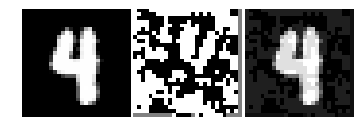

	label: 4 0.99438715 -> 0.4802195
	target: 9 0.005561781 -> 0.51882577


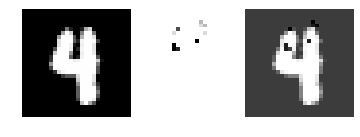

	label: 4 0.99438715 -> 0.48302823
	target: 9 0.005561781 -> 0.5153266


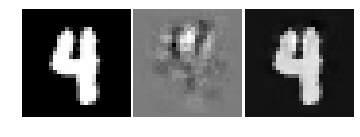

	label: 4 0.99438715 -> 0.4722832
	target: 9 0.005561781 -> 0.5266033


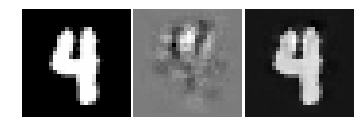

	label: 4 0.99438715 -> 0.26237604
	target: 9 0.005561781 -> 0.73643315
run with verbose=True to see details
Step 0: 6.65655e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 3360: 3.28597e-04, stepsizes = 3.4e-05/7.8e-08: 
Step 3468: 3.28597e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3469: 3.28597e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3470: 3.28597e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3471: 3.28597e-04, stepsizes = 1.8e-07/7.8e-08: 
Step 3472: 3.28597e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 3473: 3.28597e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 3474: 3.28597e-04, stepsizes = 1.2e-07/5.2e-08: 
Step 3475: 3.28597e-04, stepsizes = 1.2e-07/3.5e-08: 
Step 3476: 3.28597e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3477: 3.28597e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3478: 3.28597e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3479: 3.28597e-04, stepsizes = 7.8e-08/2.3e-08: 
Step 3480: 3.28597e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3481: 3.28597e-04, stepsizes = 5.2e-08/1.5e-08: 
Step 3482: 3.28597e-04, stepsi

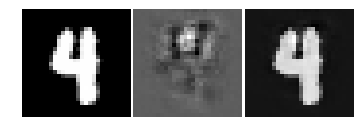

	label: 4 0.99438715 -> 0.49944073
	target: 9 0.005561781 -> 0.49943933


In [23]:
im_num = 250

# pick im + attack
ats = ['fgsm', 'saliency', 'gradientattack', 'deepfoolattack', 'boundaryattack']
vals = []
for attack_type in ats:
    # generate attack
    im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv = attack_helper.attack_im_num(dset, model, im_num, attack_type)
    vals.append((im_orig, im_torch, im_orig_adv, im_torch_adv, label, target, pred_orig, pred_adv))
    attack_helper.plot_attack(im_orig, im_orig_adv, label, target, pred_orig, pred_adv)